# **Monte-Carlo Simulations To Compute VAR and Expected Shortfall**

In [1]:
# Importing The Libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Settings The figsize Parameter For The Plots In This Notebook To Standardize The Size Of Plots

plt.rcParams["figure.figsize"]=(15,20)

In [3]:
# Setting The Start And End Parameters

end=dt.datetime.now()
start=dt.date(end.year-4,end.month,end.day)

# Setting The Ticker

ticker=["AAPL"]

# Importing The Data

df=yf.download(ticker,start,end)
print(f"{df.shape[0]} rows of data downloaded for the ticker {ticker}.")

[*********************100%%**********************]  1 of 1 completed

1006 rows of data downloaded for the ticker ['AAPL'].


In [4]:
# Check The Type Of Data

type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-10,112.599998,113.775002,110.000000,112.727501,110.289879,212403600
2020-08-11,111.970001,112.482498,109.107498,109.375000,107.009880,187902400
2020-08-12,110.497498,113.275002,110.297501,113.010002,110.566277,165598000
2020-08-13,114.430000,116.042503,113.927498,115.010002,112.523033,210082000
2020-08-14,114.830002,115.000000,113.044998,114.907501,112.422752,165565200


In [6]:
# Computing The Daily Returns

df["Daily_Returns"]=df["Adj Close"].pct_change()

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,
2020-08-10,112.599998,113.775002,110.000000,112.727501,110.289879,212403600,NaN
2020-08-11,111.970001,112.482498,109.107498,109.375000,107.009880,187902400,-0.029740
2020-08-12,110.497498,113.275002,110.297501,113.010002,110.566277,165598000,0.033234
2020-08-13,114.430000,116.042503,113.927498,115.010002,112.523033,210082000,0.017698
2020-08-14,114.830002,115.000000,113.044998,114.907501,112.422752,165565200,-0.000891


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,
2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600,0.006869
2024-08-05,199.089996,213.500000,196.000000,209.270004,209.270004,119548600,-0.048167
2024-08-06,205.300003,209.990005,201.070007,207.229996,207.229996,69660500,-0.009748
2024-08-07,206.899994,213.639999,206.389999,209.820007,209.820007,63516400,0.012498
2024-08-08,213.110001,214.199997,208.830002,213.309998,213.309998,44598400,0.016633


In [9]:
# Dropping Missing Values

df=df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,
2020-08-11,111.970001,112.482498,109.107498,109.375000,107.009880,187902400,-0.029740
2020-08-12,110.497498,113.275002,110.297501,113.010002,110.566277,165598000,0.033234
2020-08-13,114.430000,116.042503,113.927498,115.010002,112.523033,210082000,0.017698
2020-08-14,114.830002,115.000000,113.044998,114.907501,112.422752,165565200,-0.000891
2020-08-17,116.062500,116.087502,113.962502,114.607498,112.129234,119561600,-0.002611


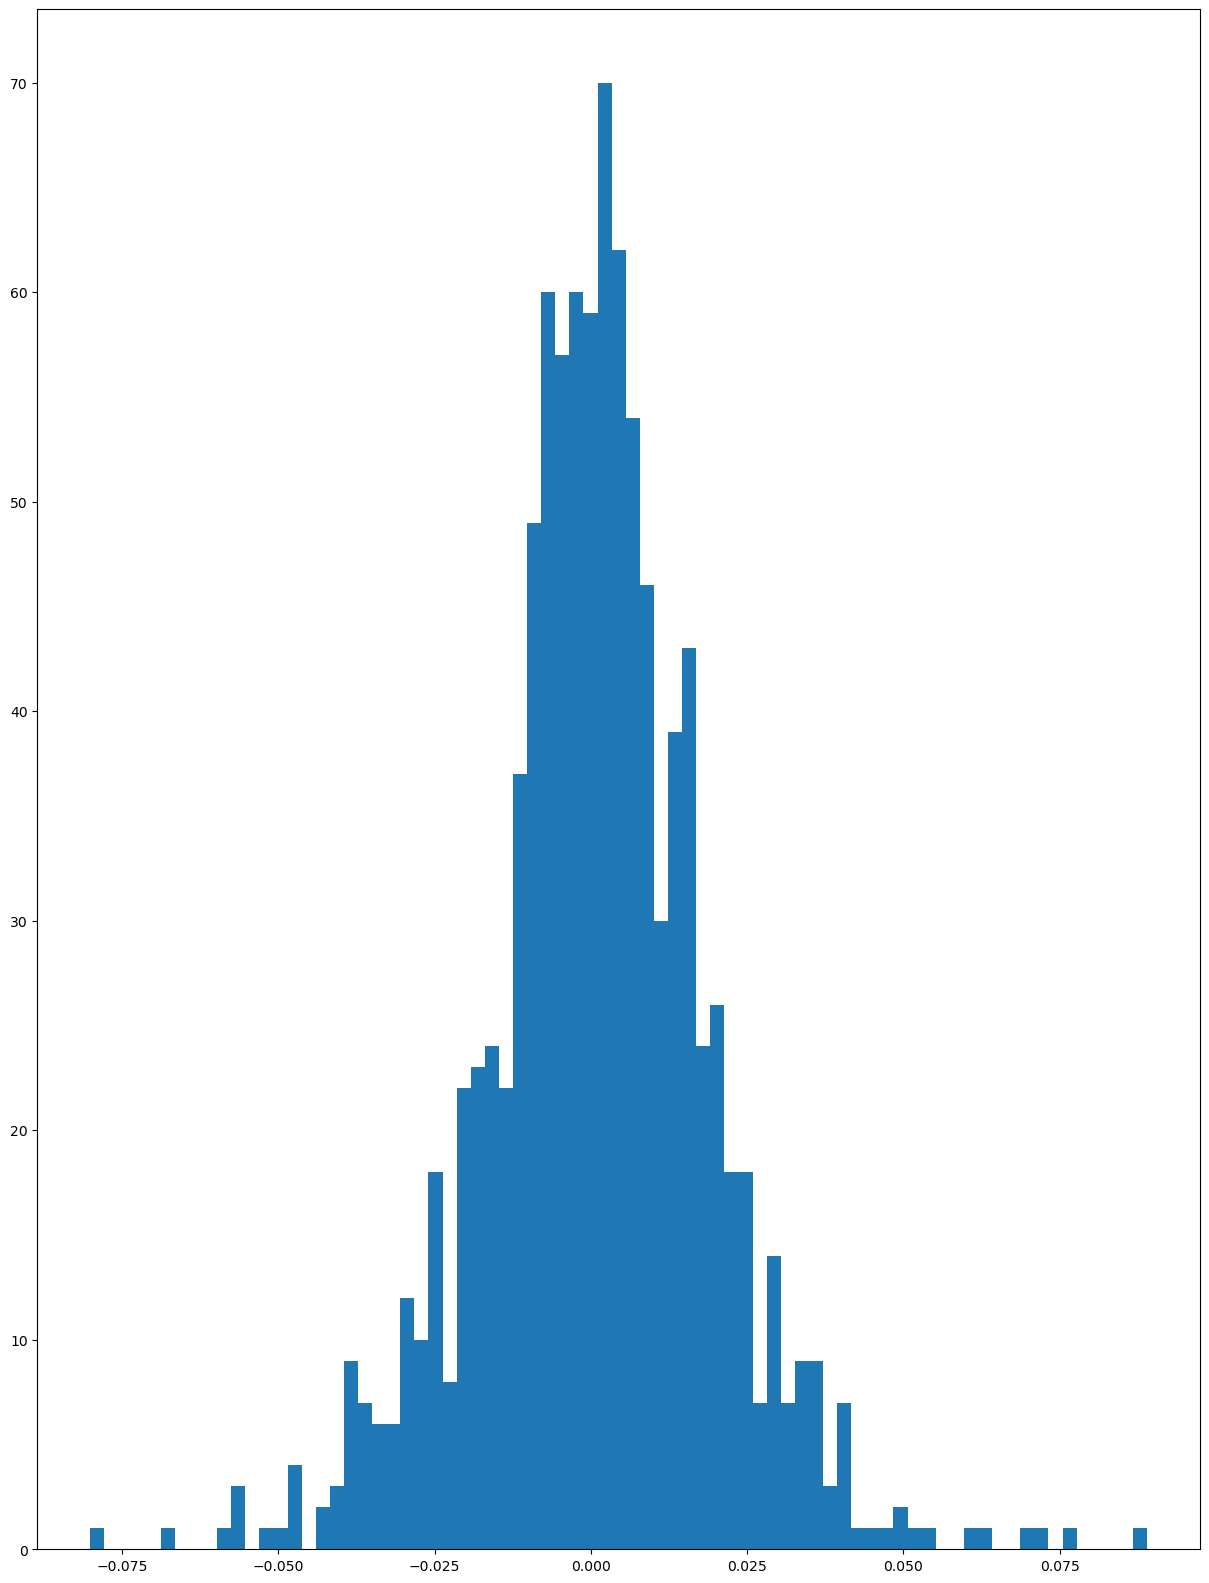

In [10]:
# Plotting The Histogram Of Daily Returns

plt.hist(df.Daily_Returns,bins=75)
plt.show()

In [11]:
# Calculating The Daily And Annualized Mean Returns

avg_daily_returns=np.mean(df.Daily_Returns)
avg_annual_returns=((1+avg_daily_returns)**252)-1

# Calculating Daily And Annualized Volatility

std_daily=(np.std(df.Daily_Returns))
std_annualized=((std_daily)*np.sqrt(252))

print("The average daily returns      = ",(avg_daily_returns))
print("The annualized daily returns   = ",(avg_annual_returns))
print("The average standard deviation = ",(std_daily))
print("The annualized volatility      = ",(std_annualized))

The average daily returns      =  0.0008206844954062926
The annualized daily returns   =  0.22964766280120852
The average standard deviation =  0.01812380536829309
The annualized volatility      =  0.28770649088784545


In [12]:
# Calculating Annualized variance

daily_variance=((std_daily)**2)
annualized_variance=(std_annualized)**2

print("The daily variance             = ",daily_variance)
print("The annualized variance        = ",annualized_variance)

The daily variance             =  0.0003284723210277694
The annualized variance        =  0.08277502489899789


In [13]:
# Computing Skewness

skewness=skew(df.Daily_Returns)
print(f"The skewness of the daily returns = {skewness}.")

The skewness of the daily returns = 0.05252508919731189.


In [14]:
# Computing Kurtosis

kurtosis=kurtosis(df.Daily_Returns)
print(f"The kurtosis of the daily returns = {kurtosis}.")

The kurtosis of the daily returns = 1.947504856997437.


In [15]:
# Computing The p value By Running The Shapiro Function On The Returns Column

p_value=shapiro(df.Daily_Returns)[1]
print(p_value)

# Print The Results

if p_value<=0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

1.5630995109372492e-10
Null hypothesis of normality is rejected.


In [16]:
returns_percent=((df.Daily_Returns)*100)
print(returns_percent)

Date
2020-08-11   -2.973980
2020-08-12    3.323428
2020-08-13    1.769759
2020-08-14   -0.089120
2020-08-17   -0.261084
                ...   
2024-08-02    0.686939
2024-08-05   -4.816700
2024-08-06   -0.974821
2024-08-07    1.249825
2024-08-08    1.663326
Name: Daily_Returns, Length: 1005, dtype: float64


### Calculating Historical VaR and Historical CVaR 

In [17]:
# Calculating VaR

VaR=(np.percentile(returns_percent,(1-0.95)*100))
print("The historical VaR =",VaR)

The historical VaR = -2.974192375408282


In [18]:
# Calculating Expected Shortfall

CVaR=returns_percent[returns_percent<VaR].mean()
print("The historical CVaR = ",CVaR)

The historical CVaR =  -3.994237463346574


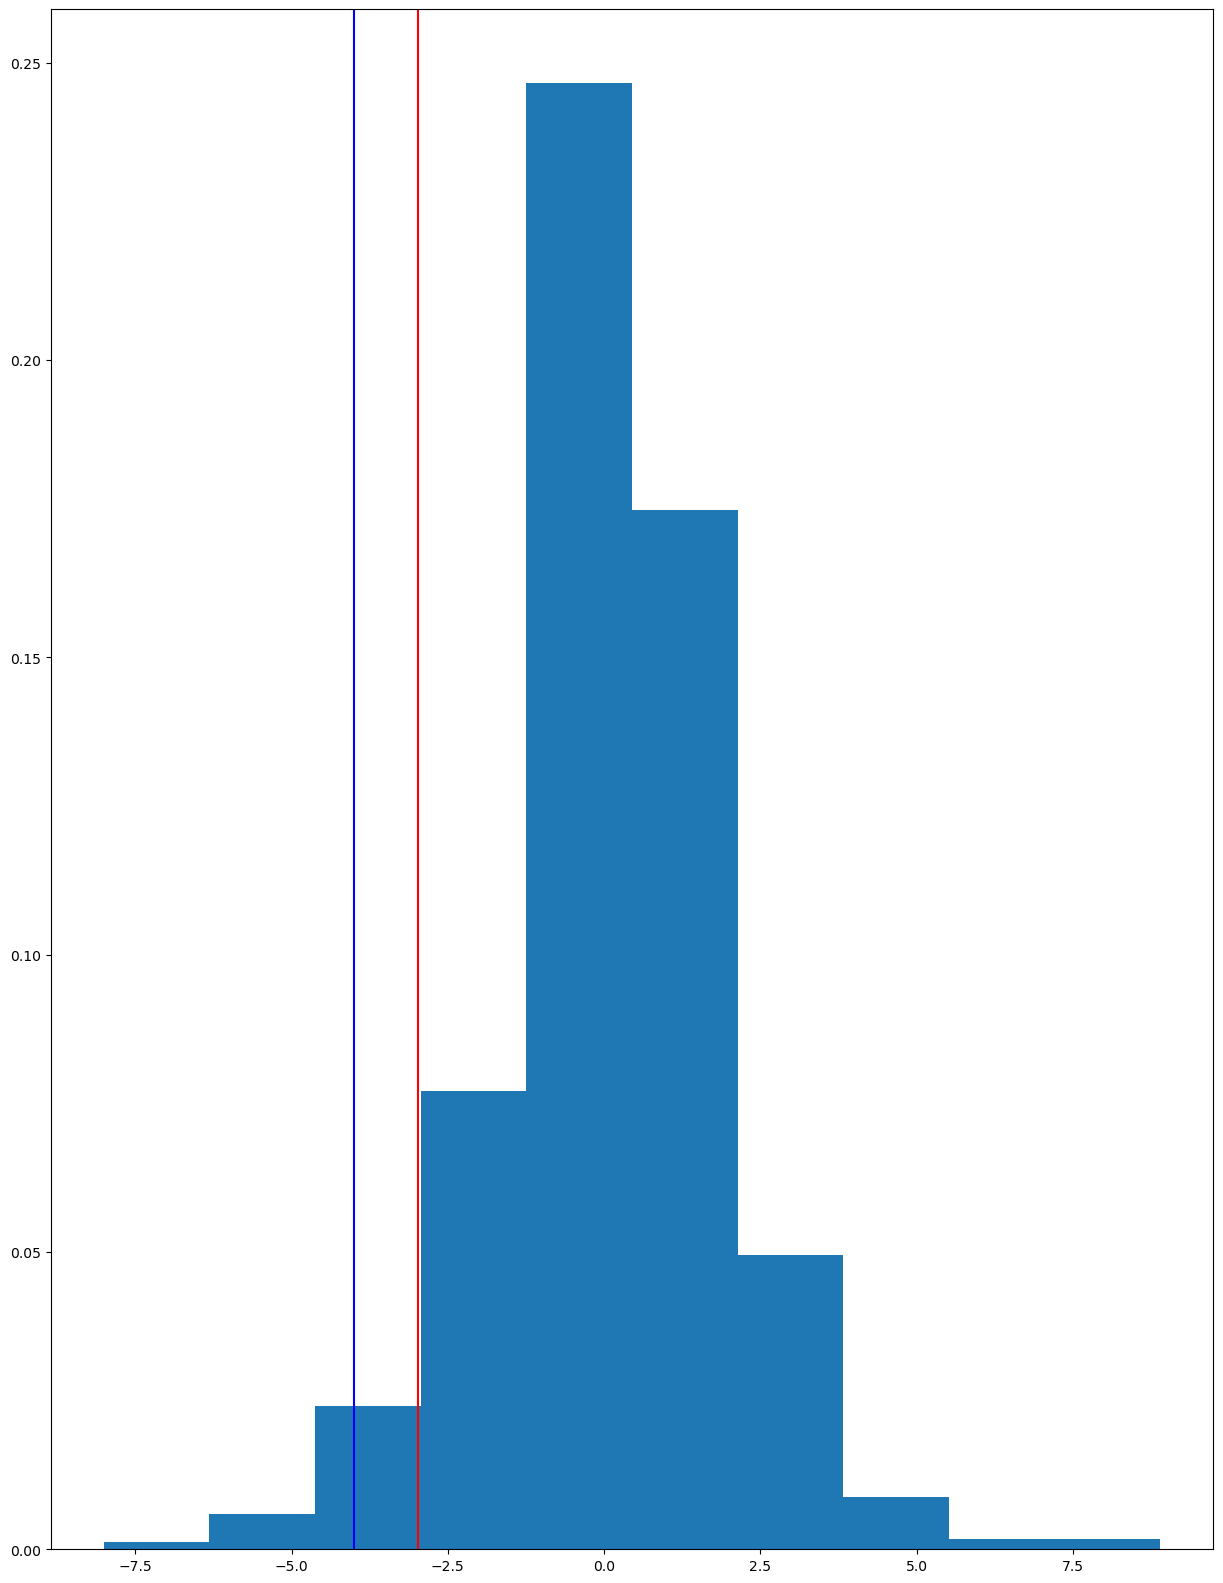

In [19]:
# Plot the Histogram For Return Percent

plt.hist(returns_percent,density=True,stacked=True)

# Drawing A Vertical Line In The Plot For VaR And CVaR

plt.axvline(x=VaR,color="r",linestyle="-",label="VaR:{0:.2f}%".format(VaR))
plt.axvline(x=CVaR,color="b",linestyle="-",label="VaR:{0:.2f}%".format(VaR))
plt.show()

### Calculating Parametric VaR and Parametric CVaR 

In [20]:
mu=np.mean(returns_percent)
vol=np.std(returns_percent)

In [21]:
# Calculating Parametric VaR

P_VaR=norm.ppf((1-0.95),mu,vol)
print("The parametric VaR = ",P_VaR)

The parametric VaR =  -2.8990322498793195


In [22]:
# Calculating Parametric CVaR

P_CVaR=returns_percent[returns_percent<P_VaR].mean()
print("The parametric CVaR = ",P_CVaR)

The parametric CVaR =  -3.9362294766786796


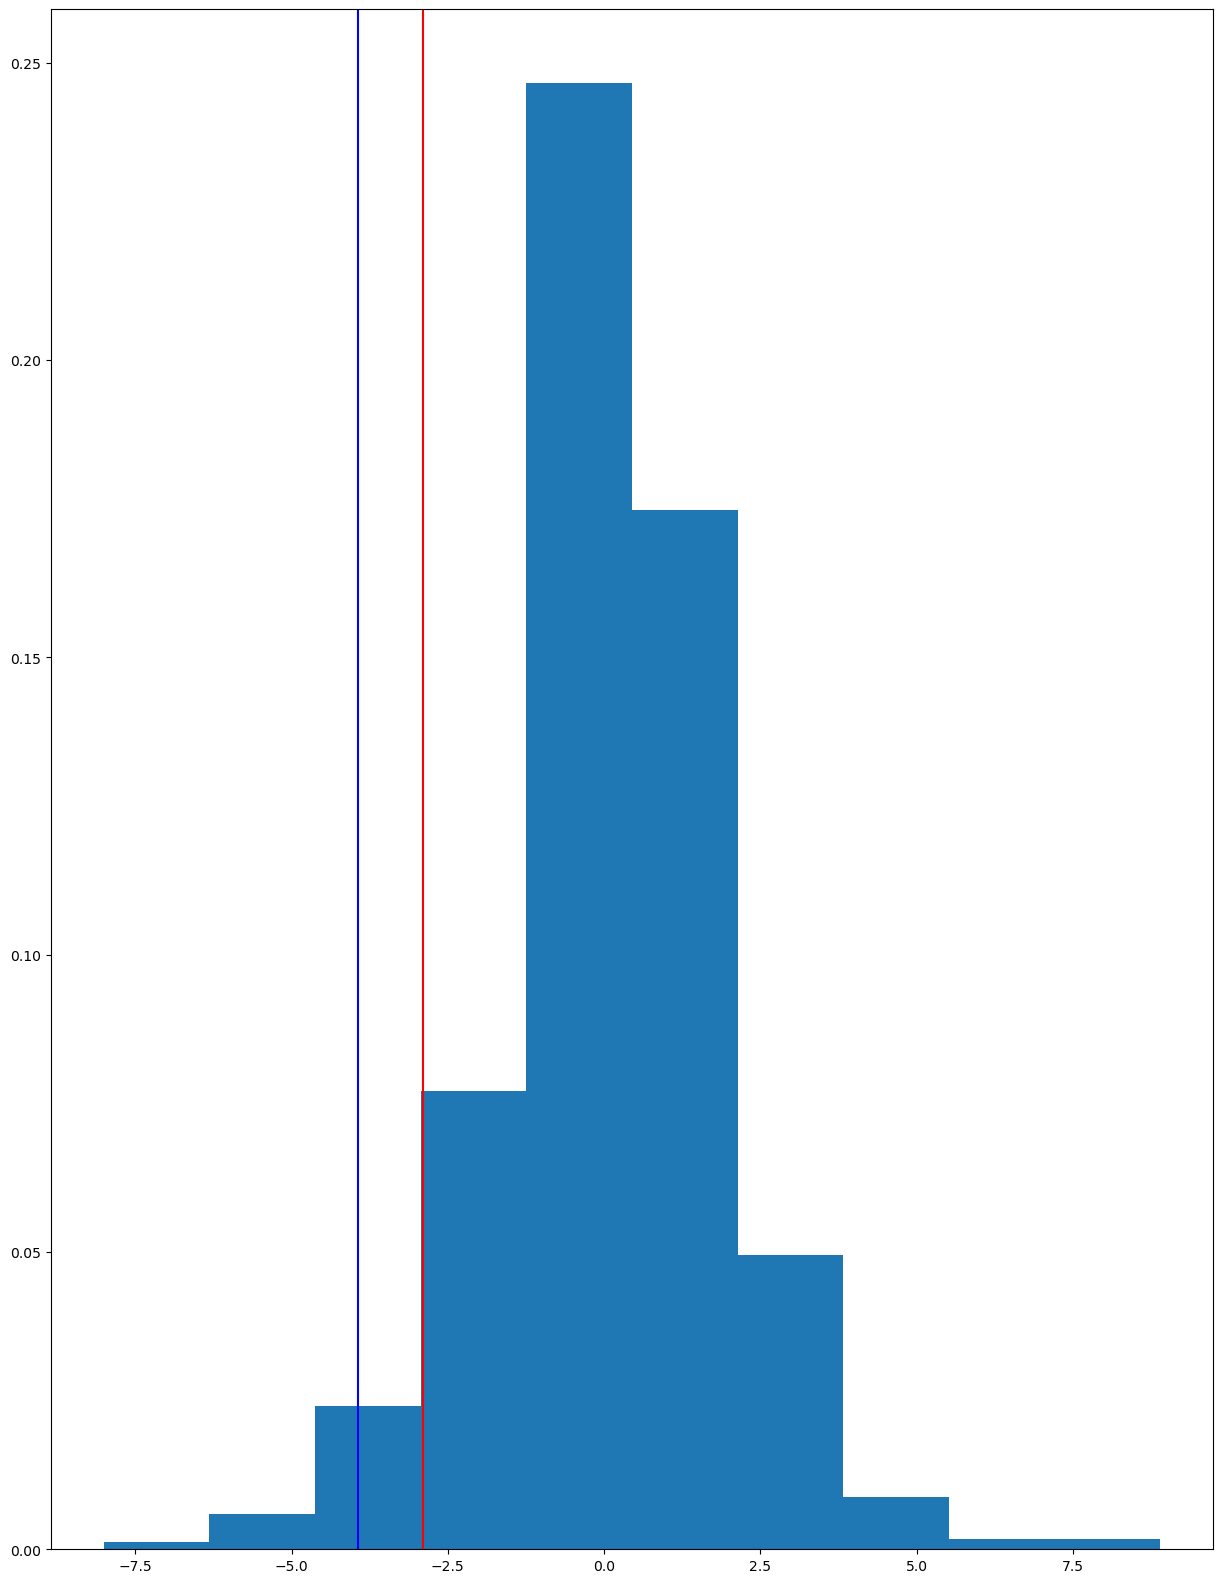

In [23]:
# Plot the Histogram For Return Percent

plt.hist(returns_percent,density=True,stacked=True)

# Drawing A Vertical Line In The Plot For VaR And CVaR

plt.axvline(x=P_VaR,color="r",linestyle="-",label="VaR:{0:.2f}%".format(VaR))
plt.axvline(x=P_CVaR,color="b",linestyle="-",label="VaR:{0:.2f}%".format(VaR))
plt.show()

### Scaling The VaR

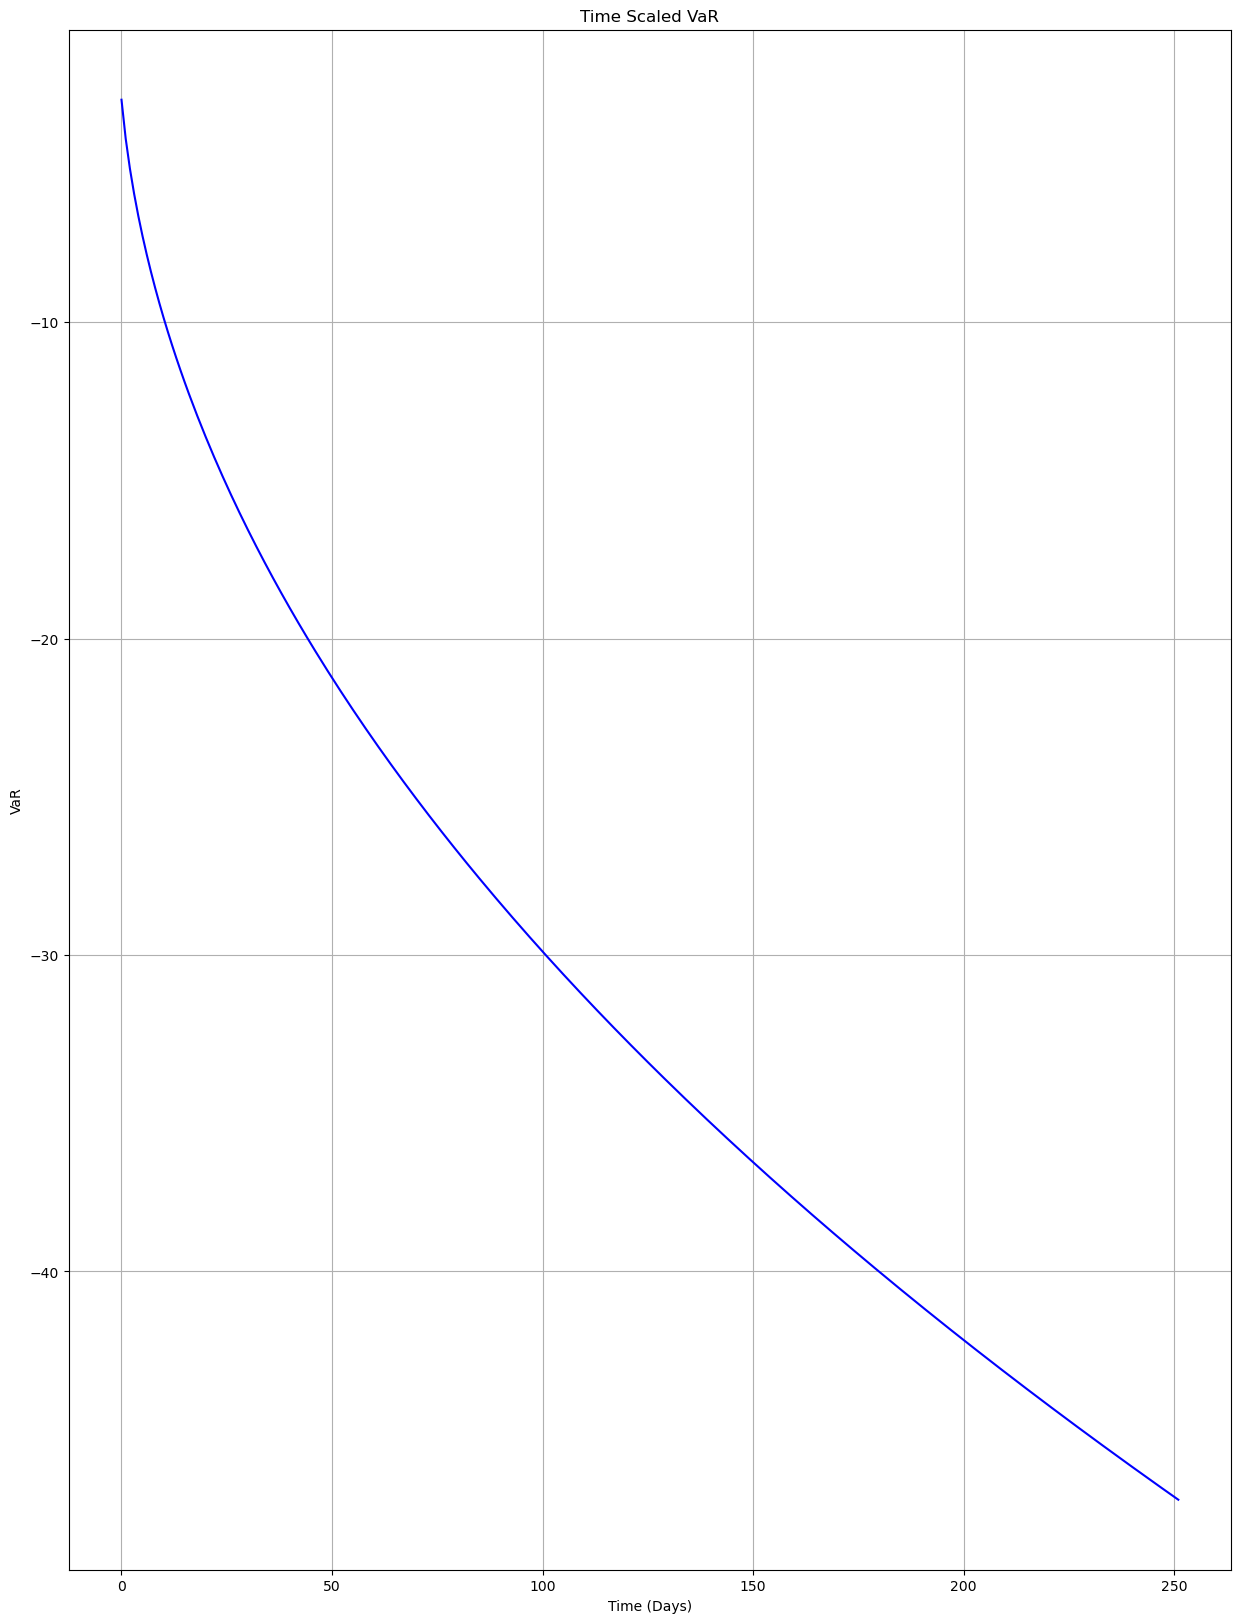

In [24]:
# Calculate VaR For Each Day And Store It In A List

VaR_day=VaR 

VaRt=[VaR_day*np.sqrt(t) for t in range(1,253)]

# Plot VaR Over Time

plt.plot(VaRt,color='blue')
plt.title('Time Scaled VaR')
plt.xlabel('Time (Days)')
plt.ylabel('VaR')
plt.grid(True)
plt.show()

### Monte Carlo Simulations To Find VaR and CVaR

In [25]:
n_sim=1000

In [26]:
# Simulate Future Returns Based On Historical Data

portfolio_returns=np.random.normal(avg_daily_returns,std_daily,n_sim)

In [27]:
# Calculating VaR (Monte Carlo)

M_VaR=np.percentile(portfolio_returns,(1-0.95)*100)
print("The VaR calculated using Monte Carlo simulation = ",M_VaR*100)

The VaR calculated using Monte Carlo simulation =  -2.6487513247857186


In [28]:
# Calculating CVaR (Monte Carlo)

M_CVaR=np.mean(portfolio_returns[portfolio_returns<M_VaR])
print("The CVaR calculated using Monte Carlo simulation = ",M_CVaR*100)

The CVaR calculated using Monte Carlo simulation =  -3.3434283199176664


In [29]:
# Simulating The Prices Using Monte Carlo Simulations

one_year_back=dt.date(end.year-1,end.month,end.day)

df1=yf.download(ticker,start,end)
prices=df1["Adj Close"]
prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
2020-08-10    110.289879
2020-08-11    107.009880
2020-08-12    110.566277
2020-08-13    112.523033
2020-08-14    112.422752
Name: Adj Close, dtype: float64

In [30]:
p0=prices[0]

C:\Users\abhij\AppData\Local\Temp\ipykernel_12224\2103586891.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p0=prices[0]


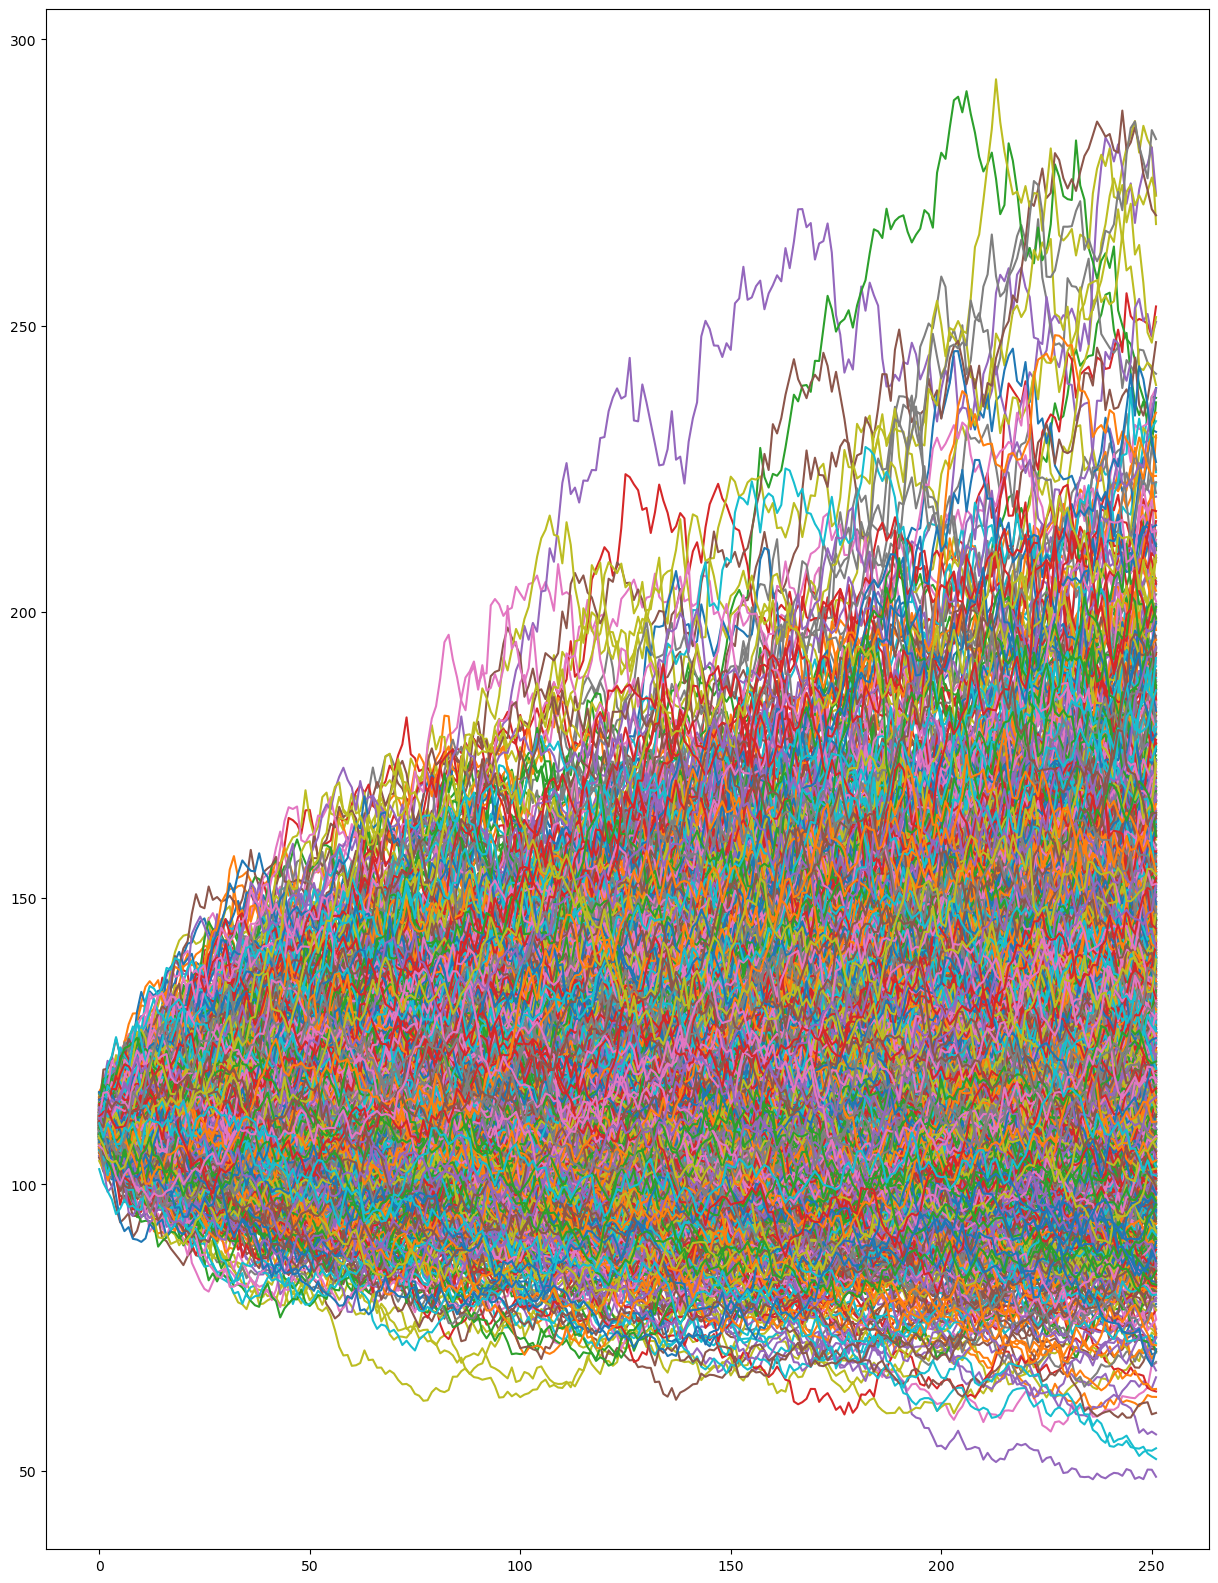

In [31]:
# Loop Through Simulations

for i in range(n_sim):

    # Generate The REandom Returns
    
    portfolio_returns=np.random.normal(avg_daily_returns,std_daily,252)+1

    # Create The Monte Carlo Path
    
    forecasted_values=p0*np.cumprod(portfolio_returns)

    # Plot The Monte Carlo Path
    
    plt.plot(range(252),forecasted_values)

# Show The Simulations

plt.show()